In [14]:
from scipy.cluster.hierarchy import linkage
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, dbscan
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.cluster import contingency_matrix


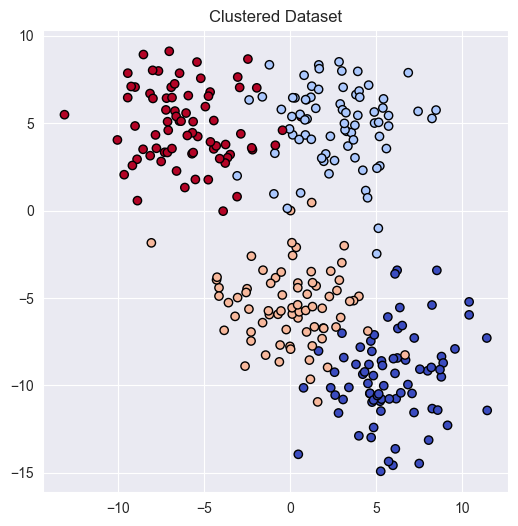

In [26]:
X, y = make_blobs(n_samples=300, centers=4, n_features=2, random_state=10, cluster_std=2.5)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Clustered Dataset')
plt.show()

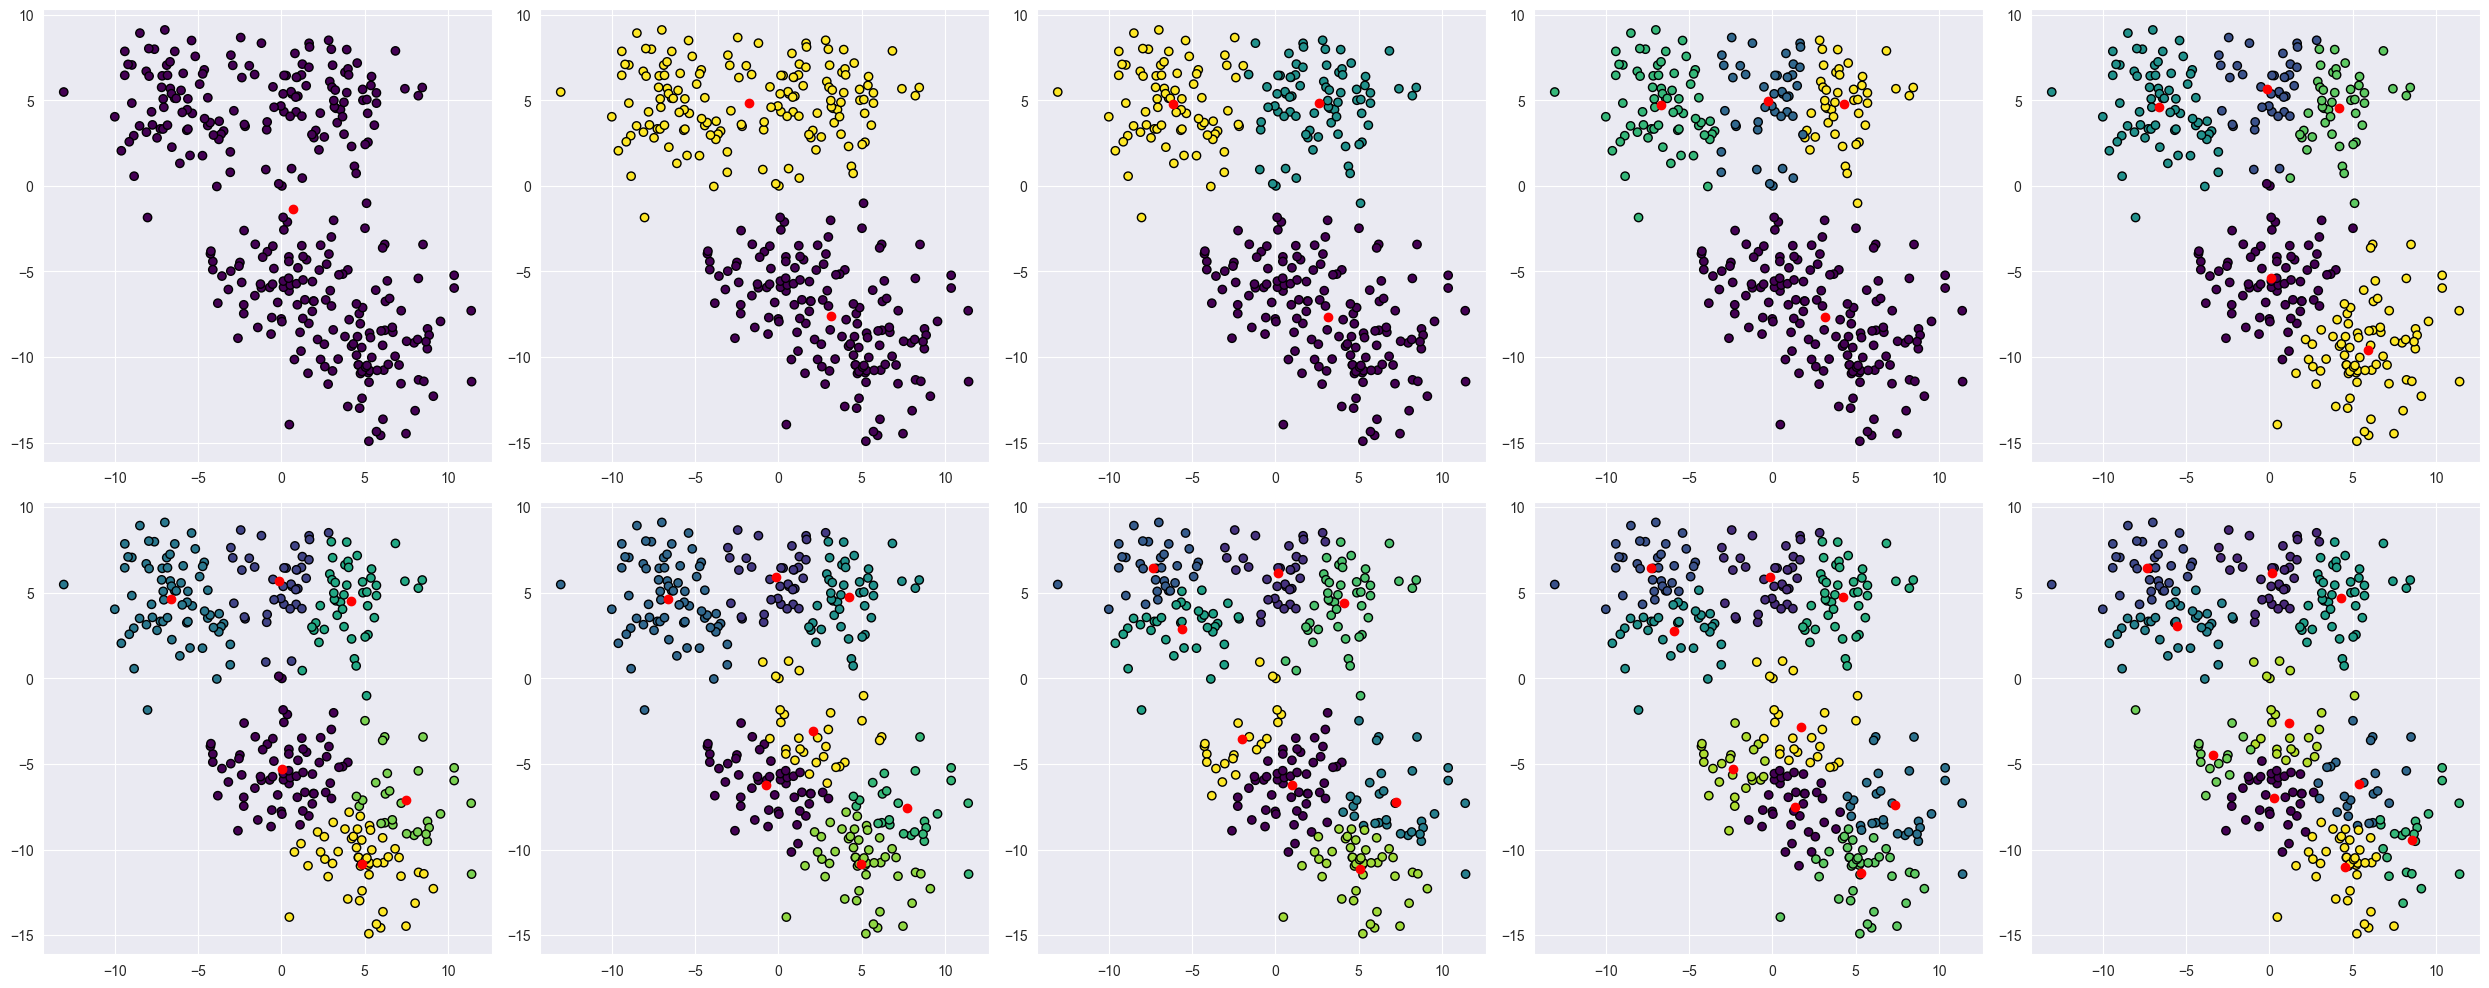

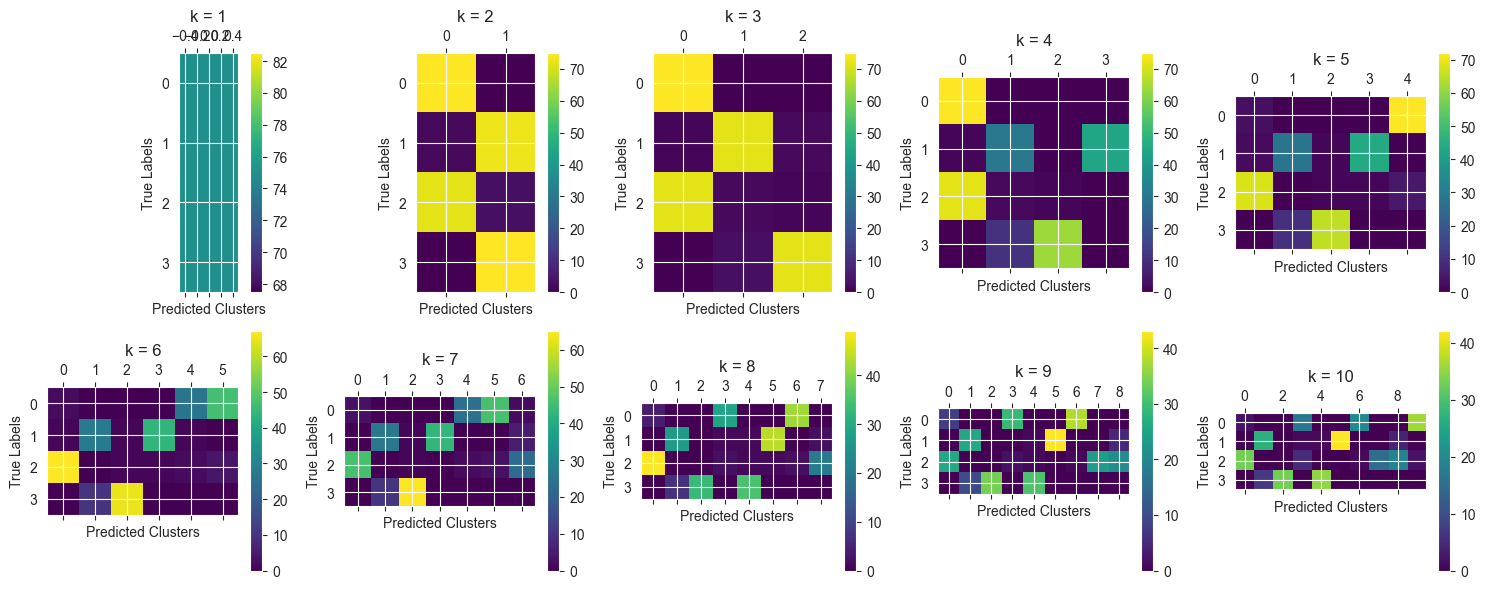

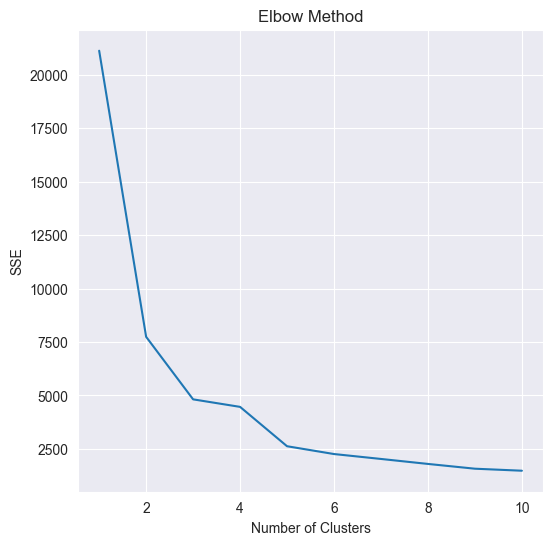

In [27]:

k = np.arange(1, 11)


plt.figure(figsize=(25, 10))
cont_matrices = []
sse = []

for i in range(len(k)):
    kmeans = KMeans(n_clusters=k[i], random_state=542)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    y_kmeans = kmeans.predict(X)
    cm = contingency_matrix(y, y_kmeans)
    cont_matrices.append(cm)
    sse.append(kmeans.inertia_)
    plt.subplot(2, 5, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k')
    plt.scatter(centers[:, 0], centers[:, 1], c='red')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(len(k)):
    ax = axes[i // 5, i % 5] 
    cax = ax.matshow(cont_matrices[i], cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'k = {k[i]}')
    ax.set_xlabel('Predicted Clusters')
    ax.set_ylabel('True Labels')
    
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(k, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('SSE plot')
plt.show()

In [34]:
import pandas as pd

df = pd.read_csv('vertebrate.csv')
df.head(20)

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


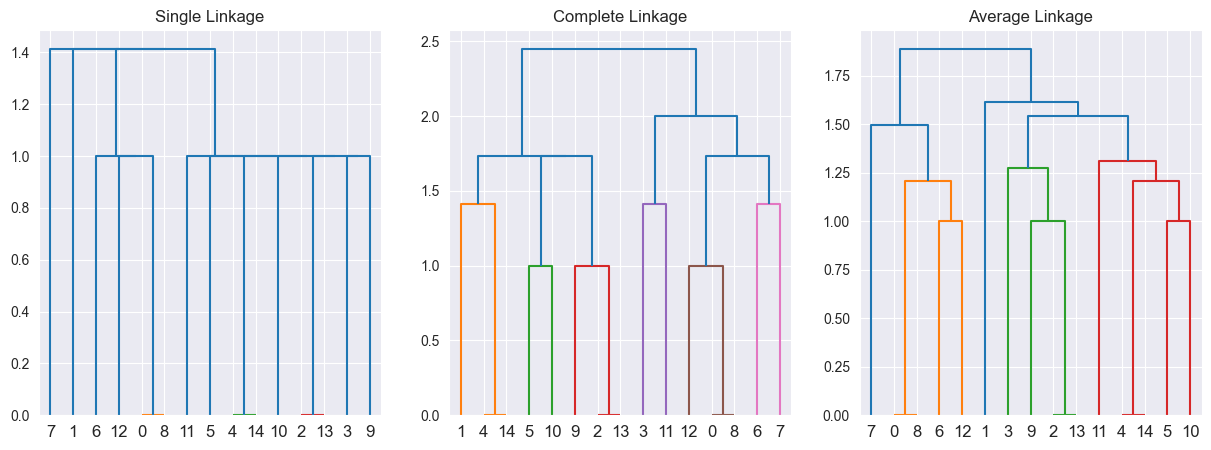

In [33]:
import pandas as pd
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

df = pd.read_csv('vertebrate.csv')
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns

df_drop = df.drop(columns=non_numeric_cols)
df_dummy = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

X = df_drop.values

Z_single = hierarchy.linkage(X, 'single')
Z_max = hierarchy.linkage(X, 'complete')
Z_average = hierarchy.linkage(X, 'average')


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(1, 3, 1)
dendrogram(Z_single)
plt.title('Single Linkage')
plt.subplot(1, 3, 2)
dendrogram(Z_max)
plt.title('Complete Linkage')
plt.subplot(1, 3, 3)
dendrogram(Z_average)
plt.title('Average Linkage')
plt.show()



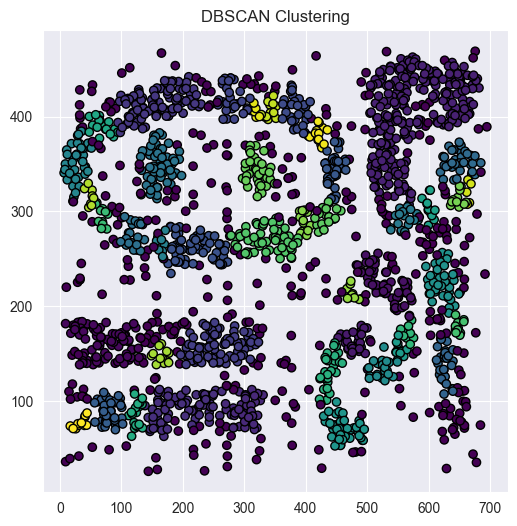

In [81]:
from sklearn.cluster import DBSCAN

df = pd.read_csv('chameleon.csv')

df.head()

dbscan = DBSCAN(eps=15, min_samples=10)
dbscan.fit(df)
labels =dbscan.labels_

plt.figure(figsize=(6, 6))
plt.scatter(df['x'], df['y'], c=labels, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.show()

